In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [3]:
data = pd.read_csv('C:/Rahul Data/Project 2/Data/Colorado motor sale data/colorado_motor_vehicle_sales.csv')

In [4]:
data.head()

,year,quarter,county,sales
0,2008,1,Adams,231609000
1,2008,1,Arapahoe,550378000
2,2008,1,Boulder/Broomfield,176771000
3,2008,1,Denver,200103000
4,2008,1,Douglas,93259000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     501 non-null    int64 
 1   quarter  501 non-null    int64 
 2   county   501 non-null    object
 3   sales    501 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [6]:
data.describe()

,year,quarter,sales
count,501.000000,501.000000,5.010000e+02
mean,2011.570858,2.502994,1.760585e+08
std,2.266599,1.120041,1.642055e+08
min,2008.000000,1.000000,6.274000e+06
25%,2010.000000,2.000000,6.148200e+07
50%,2012.000000,3.000000,1.385820e+08
75%,2014.000000,4.000000,2.241580e+08
max,2015.000000,4.000000,9.169100e+08


In [7]:
missing_values = data.isnull().sum()

In [8]:
print("Missing Value of each Column:\n",missing_values)

Missing Value of each Column:
 year       0
quarter    0
county     0
sales      0
dtype: int64


In [9]:
duplicate_rows = data.duplicated().sum()

In [10]:
print("\nTotal Duplicate Rows",duplicate_rows)


Total Duplicate Rows 0


In [11]:
#Aggregate Sale by Year
yearly_sale = data.groupby('year')['sales'].sum()

In [12]:
plt.figure(figsize =(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

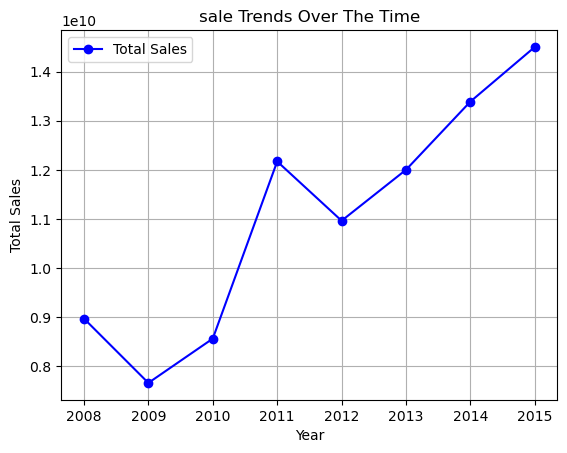

In [13]:
plt.plot(yearly_sale.index,yearly_sale.values,marker = 'o',linestyle ='-',color='b',label="Total Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("sale Trends Over The Time")
plt.legend()
plt.grid(True)
plt.show()

In [14]:
# Aggregate total sale by country
county_sale = data.groupby("county")["sales"].sum().sort_values(ascending = False)

In [15]:
#print top counties by sales
print(county_sale.head())

county
Arapahoe     20142323000
El Paso      11926044000
Jefferson     9058407000
Adams         8902115000
Denver        6763613000
Name: sales, dtype: int64


In [16]:
# Aggregate total sale by Quarter
quarterly_sales = data.groupby("quarter")["sales"].sum()

<BarContainer object of 4 artists>

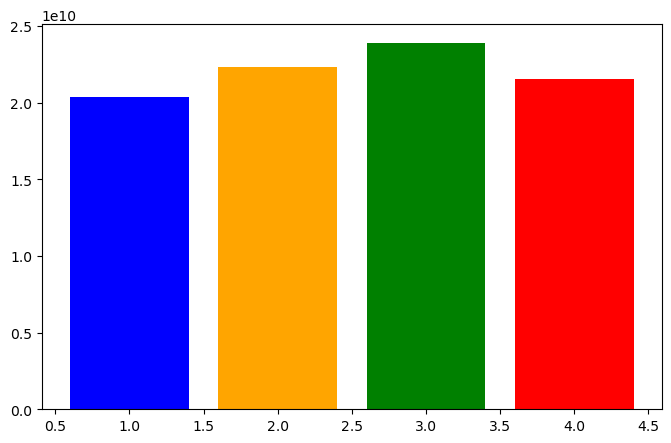

In [17]:
plt.figure(figsize=(8,5))
plt.bar(quarterly_sales.index, quarterly_sales.values, color = ['blue','orange','green','red'])

In [18]:
# Aggregate total sales by country
county_sale = data.groupby("county")["sales"].sum()

In [19]:
# find the best and worst

In [20]:
best_county = county_sale.idxmax()
best_sale = county_sale.max()
worst_county = county_sale.idxmin()
worst_sale= county_sale.min()

In [21]:
# Print the results
print(f"Best Performing County: {best_county} with ${best_sale:,.2f} in sales")
print(f"Worst Performing County: {worst_county} with ${worst_sale:,.2f} in sales")

Best Performing County: Arapahoe with $20,142,323,000.00 in sales
Worst Performing County: Fremont with $316,939,000.00 in sales


In [22]:
# Get the top 5 best-performing country
top_5_counties = county_sale.sort_values(ascending=False).head(5)

In [23]:
# Get the bottom 5 worst-performing county
bottom_5_counties = county_sale.sort_values(ascending= True).head(5)

In [24]:
print("\n Top 5 performing countries")
print(top_5_counties)
print("\n Bottom 5 Performing Countries")
print(bottom_5_counties)


 Top 5 performing countries
county
Arapahoe     20142323000
El Paso      11926044000
Jefferson     9058407000
Adams         8902115000
Denver        6763613000
Name: sales, dtype: int64

 Bottom 5 Performing Countries
county
Fremont                316939000
Boulder/Broomfield     677201000
La Plata               792807000
Broomfield            1027326000
Garfield              1600594000
Name: sales, dtype: int64


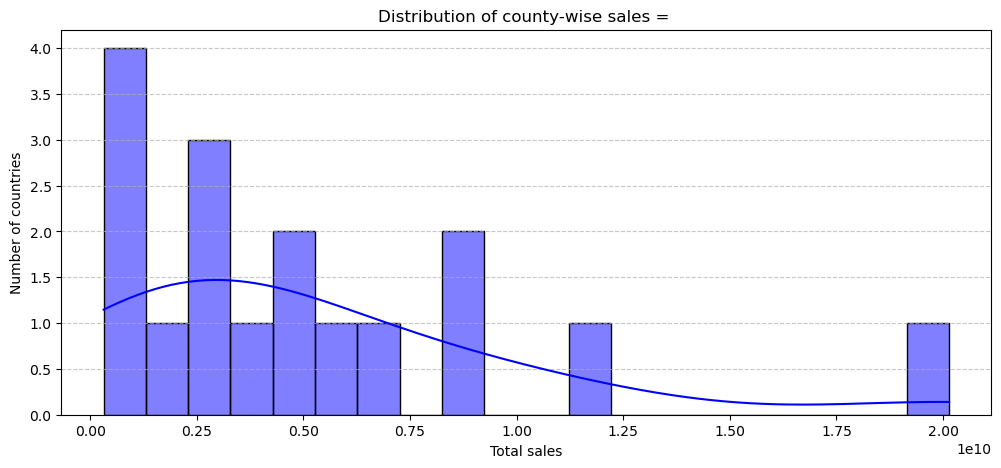

In [25]:
# Plot distribution of sales across countries
plt.figure(figsize=(12,5))
sns.histplot(county_sale,bins=20,kde=True,color="blue")
plt.xlabel("Total sales")
plt.ylabel("Number of countries")
plt.title("Distribution of county-wise sales = ")
plt.grid(axis="y",linestyle="--",alpha=0.7)
plt.show()

In [26]:
# group sale by year and county
yearly_county_sale = data.groupby(["year","county"])["sales"].sum().reset_index()

In [27]:
# filter for best and worst counties
best_county_sale = yearly_county_sale[yearly_county_sale["county"] == best_county]

In [28]:
worst_county_sale = yearly_county_sale[yearly_county_sale["county"] == worst_county]

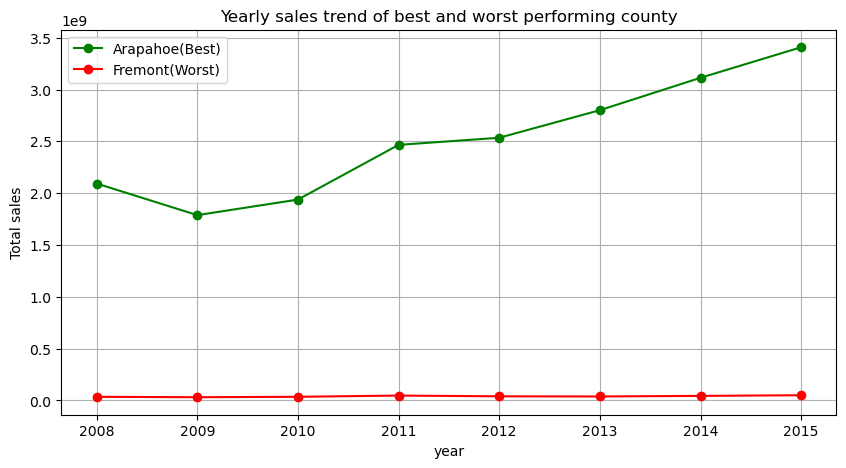

In [29]:
# plot sales trend
plt.figure(figsize=(10,5))
plt.plot(best_county_sale["year"], best_county_sale["sales"],marker = "o", linestyle ="-",color ="green",label = f"{best_county}(Best)")
plt.plot(worst_county_sale["year"],worst_county_sale["sales"], marker="o",linestyle ="-", color ="red", label =f"{worst_county}(Worst)")
plt.xlabel("year")
plt.ylabel("Total sales")
plt.title("Yearly sales trend of best and worst performing county")
plt.legend()
plt.grid(True)
plt.show()


In [30]:
# Filter for best-performing county sales
best_county_data = data[data["county"] == best_county]


In [31]:
# Group sales by quarter
quarterly_trends = best_county_data.groupby("quarter")["sales"].sum()


<BarContainer object of 4 artists>

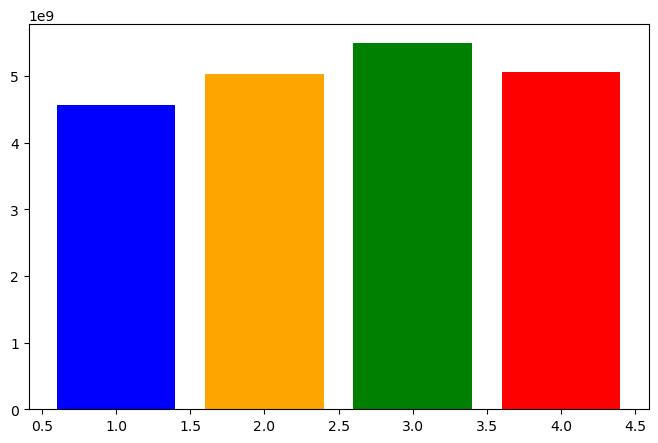

In [32]:
# Plot
plt.figure(figsize=(8,5))
plt.bar(quarterly_trends.index, quarterly_trends.values, color=['blue', 'orange', 'green', 'red'])


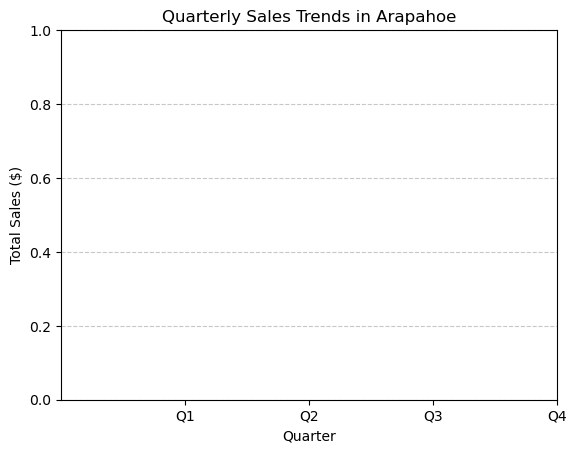

In [33]:
plt.xlabel("Quarter")
plt.ylabel("Total Sales ($)")
plt.title(f"Quarterly Sales Trends in {best_county}")
plt.xticks(ticks=[1, 2, 3, 4], labels=["Q1", "Q2", "Q3", "Q4"])
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

In [34]:
#calulate the % contribution of top 5 countries
top_5_counties = county_sale.sort_values(ascending=False).head(5)
total_sales = county_sale.sum()
top_5_percent = (top_5_counties.sum()/total_sales)*100
print(f"Top 5 Country contribute {top_5_percent:.2f}% of total sales.")


Top 5 Country contribute 64.39% of total sales.


In [35]:
# compute the standard deviation of yearly sales per county
sales_volatility = data.groupby("county")["sales"].std().sort_values(ascending=False)
# Display the most volatile countries
print("Most Volatile Countrie in sales")
print(sales_volatility.head(5))

Most Volatile Countrie in sales
county
Arapahoe     1.465202e+08
Adams        8.217812e+07
El Paso      7.493149e+07
Jefferson    6.454778e+07
Larimer      4.329103e+07
Name: sales, dtype: float64


In [36]:
# group sales by year and county
yearly_sales = data.groupby(["year","county"])["sales"].sum().unstack()
# compute growth rate(CAGR) for each county
growth_rates = ((yearly_sales.iloc[-1]/yearly_sales.iloc[0])**(1/(len(yearly_sales)-1))-1)*100
# Display top 5 growing and declining counties
print("Top 5 Fastest Growing Counties")
print(growth_rates.sort_values(ascending=False).head(5))
print("\n Top 5 Fastest Declining Counties")
print(growth_rates.sort_values().head(5))

Top 5 Fastest Growing Counties
county
Adams       8.736760
Larimer     8.420285
Douglas     7.913699
Arapahoe    7.215545
El Paso     6.585986
dtype: float64

 Top 5 Fastest Declining Counties
county
Mesa        0.736972
Denver      3.269944
Garfield    3.584292
Weld        4.365817
Fremont     5.356673
dtype: float64


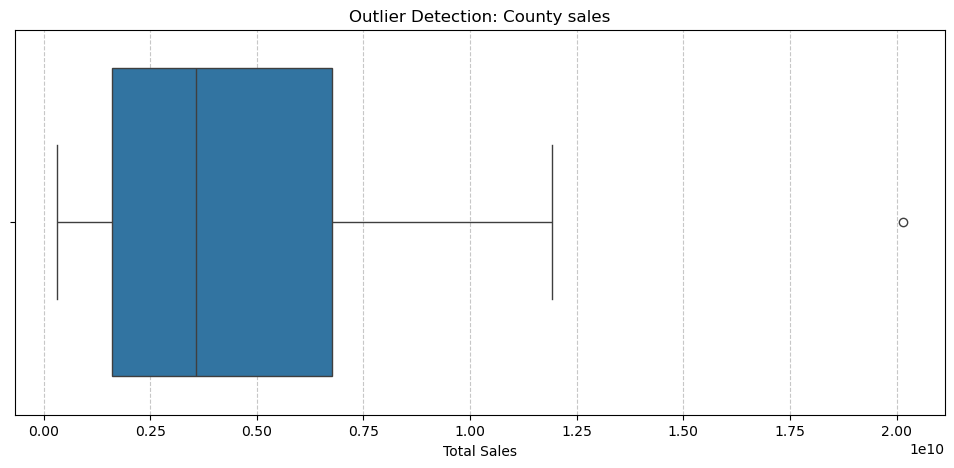

In [37]:
# Boxplot of sales distribution across counties
plt.figure(figsize=(12,5))
sns.boxplot(x=county_sale)
plt.xlabel("Total Sales")
plt.title("Outlier Detection: County sales")
plt.grid(axis ="x",linestyle ="--",alpha =0.7)
plt.show()